In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df_train_sub = pd.read_csv('C:\\Users\\DF6610\\Downloads\\nlp-cs-2025\\NLP_kaggle_text\\train_submission.csv')
df_test_without_labels = pd.read_csv('C:\\Users\\DF6610\\Downloads\\nlp-cs-2025\\NLP_kaggle_text\\test_without_labels.csv')


In [11]:
print('Nombres de phrases : '+str(df_train_sub.shape[0]))

Nombres de phrases : 190599


# 1) Valeurs manquantes

In [12]:
# Les valeurs manquantes ?
df_train_sub.isnull().sum()

Usage      0
Text       0
Label    500
dtype: int64

In [13]:
df_train_sub[df_train_sub.Label.isnull()]

,Usage,Text,Label
107,Public,Kòe bô jōa kú hō͘-sū sió-chiá lâi kā góan mn̄...,NaN
803,Public,Söğütçük sī chi̍t ê tī Türkiye Aydın séng Çine...,NaN
1095,Public,Golden Valley Kūn ū khó-lêng sī kóng:,NaN
1894,Public,Tī Montégut-Lauragais ê sì-ûi ū Nogaret Revel...,NaN
2499,Public,Soveria Simeri ùi séng lāi ê hoān-ûi.,NaN
...,...,...,...
189637,Public,Bellebrune sī ūi-tī Hoat-kok Nord-Pas-de-Calai...,NaN
189946,Public,Bô phah-sǹg tī sin-le̍k 10 go̍eh 29 hō ē-po͘ ...,NaN
189959,Public,Wiejki sī chi̍t ê tī Pho-lân Kiōng-hô-kok Podl...,NaN
190397,Public,Tī pún só͘-chāi sì-ûi ê tē-hng ū Valy Veselí ...,NaN


In [14]:
# Il y a 500 valeurs manquantes de labels
# On complète les valeurs manquantes de langues par unk pour "unknown" pour l'instant, on pourrait utiliser une autre approche par la suite notamment après l'embedding


In [15]:
df_train_sub.Label = df_train_sub.Label.fillna('unk')

In [16]:
# On vérifie que ça a marché
df_train_sub.isnull().sum()

Usage    0
Text     0
Label    0
dtype: int64

# 2) Doublons de textes

In [18]:
# On vérifie s'il y a des doublons :
text_doubles=list((df_train_sub['Text'].value_counts()[df_train_sub['Text'].value_counts()!=1]).index)

In [19]:
df_train_sub[df_train_sub.Text.isin(text_doubles)]

,Usage,Text,Label
1184,Public,al cayente pos les élites sureñes víen al Klan...,uig
6149,Public,Der König des Schreckens : ein Vatikan-Krimi ...,pfl
12045,Public,organización al cayente pos les élites sureñes...,ful
12500,Public,organización al cayente pos les élites sureñes...,uig
15292,Public,Umnqopho wamano weHlelo lezeziNdlu zikaRhulume...,nbl
...,...,...,...
178069,Public,Da Ort hod bei da Voikszejung 94,mwl
182078,Public,llingua dalmática nun tienen ser confundíes po...,ful
183362,Public,Magama wesithekniki abekwe ebujameni obuvunyel...,nbl
189013,Public,Nel 1979 compone in collaborazione con Guido T...,ile


In [20]:
# Les doublons n'ont pas la même langue => Le dataset n'est pas parfait
# Nous allons laisser la labellisation comme suit, peut être c'est la même langue avec différents dialectes

# 3) Distribution des langues

In [21]:
df_train_sub.Label.value_counts()

Label
tgk    1500
uig    1000
bak    1000
hbs    1000
kaa    1000
       ... 
tvl       2
toi       1
kua       1
gcr       1
gaa       1
Name: count, Length: 390, dtype: int64

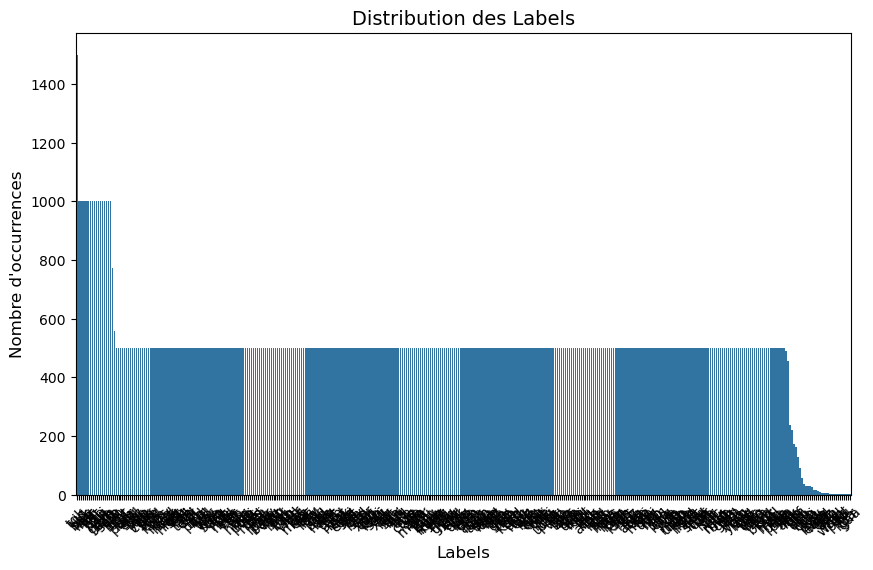

In [22]:
# Il y a 390 labels => c'est énorme !
# les labels sont désiquilibrés aussi

# Il y a 390 labels => c'est énorme !
# les labels sont désiquilibrés aussi
import seaborn as sns
import matplotlib.pyplot as plt

# Comptage des occurrences des labels
label_counts = df_train_sub.Label.value_counts()

# Création du barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

# Ajout de titres et labels
plt.title("Distribution des Labels", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45)  # Rotation des labels si nécessaire

# Affichage
plt.show()

In [23]:
labels=pd.DataFrame(df_train_sub.Label.value_counts())
labels=labels.reset_index()

In [24]:
label_counting_counts=labels['count'].value_counts()

📊 Moyenne : 243.59
📊 Médiane : 58.0
📊 Q1 (25%) : 13.0
📊 Q3 (75%) : 456.0
📊 Q3+1.5iqr : 1120.5
📊 Q1-1.5iqr  : -651.5


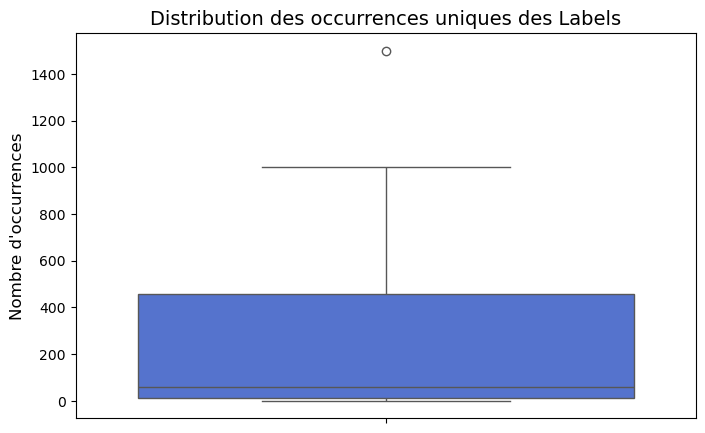

In [25]:
# Extraction des valeurs sous forme de liste
data = list(label_counting_counts.index)

# Calcul des statistiques
mean_value = np.mean(data)
median_value = np.median(data)
q1 = np.percentile(data, 25)  # Premier quartile (Q1)
q3 = np.percentile(data, 75)  # Troisième quartile (Q3)
iqr = q3-q1


# Affichage des statistiques
print(f'📊 Moyenne : {mean_value:.2f}')
print(f'📊 Médiane : {median_value}')
print(f'📊 Q1 (25%) : {q1}')
print(f'📊 Q3 (75%) : {q3}')
print(f'📊 Q3+1.5iqr : {q3+1.5*iqr}')
print(f'📊 Q1-1.5iqr  : {q1-1.5*iqr}')

# Création du box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=data, color="royalblue")

# Ajout de titres et labels
plt.title("Distribution des occurrences uniques des Labels", fontsize=14)
plt.ylabel("Nombre d'occurrences", fontsize=12)

# Affichage du graphique
plt.show()

In [26]:
labels_to_delete=list(labels[labels['count']<200].Label)

In [27]:
# Suppression des lignes de df_train_sub où le label est dans labels_to_delete
df_train_sub_cleaned = df_train_sub[~df_train_sub['Label'].isin(labels_to_delete)]

In [28]:
langues = list(df_train_sub_cleaned.Label.value_counts().index)
langues

['tgk',
 'gom',
 'bak',
 'hbs',
 'kaa',
 'kur',
 'hin',
 'tat',
 'srp',
 'aze',
 'hau',
 'guj',
 'kat',
 'uig',
 'uzb',
 'crh',
 'mon',
 'som',
 'tuk',
 'san',
 'rmy',
 'cat',
 'nor',
 'bqc',
 'bos',
 'arg',
 'eml',
 'swc',
 'kab',
 'glk',
 'yap',
 'ajp',
 'cym',
 'ekk',
 'pam',
 'tam',
 'div',
 'cak',
 'kom',
 'isl',
 'hus',
 'mzn',
 'chv',
 'msa',
 'snd',
 'apc',
 'afr',
 'srm',
 'est',
 'sco',
 'kik',
 'ext',
 'tok',
 'fil',
 'fin',
 'hmo',
 'nbl',
 'tzo',
 'als',
 'ber',
 'ibo',
 'tuc',
 'kal',
 'yid',
 'war',
 'hrv',
 'nde',
 'smo',
 'csb',
 'ary',
 'fra',
 'glv',
 'plt',
 'mwl',
 'bis',
 'eus',
 'gym',
 'urd',
 'pnb',
 'hmn',
 'ile',
 'por',
 'ara',
 'zai',
 'rue',
 'hui',
 'pls',
 'mps',
 'dzo',
 'bel',
 'aoj',
 'mau',
 'pan',
 'bam',
 'slk',
 'jav',
 'dyu',
 'lzh',
 'djk',
 'fon',
 'pcm',
 'mad',
 'mri',
 'ban',
 'cab',
 'ilo',
 'wuu',
 'fas',
 'ell',
 'mal',
 'kos',
 'cjk',
 'ukr',
 'sat',
 'prs',
 'bzj',
 'ido',
 'slv',
 'zul',
 'sna',
 'ikk',
 'hif',
 'jpn',
 'tur',
 'arn',


In [29]:
#le problème est un peu plus équilibré
print(f'Nombres de langues : {len(langues)}')

Nombres de langues : 361


In [30]:
df_train_sub_cleaned=df_train_sub_cleaned.drop(['Usage'],axis=1)

In [31]:
df_train_sub_cleaned['identifiant']=df_train_sub_cleaned.index
df_train_sub_cleaned

,Text,Label,identifiant
0,َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...,hau,0
1,Filmen forteller historien om Will Hunting en...,nob,1
2,An Arthrostylidium berryi in uska species han ...,wln,2
3,Kancunarí enemigosniyquichejta munacuychej al...,quh,3
4,Warmeqa ama yachachichunchu hermanospa tantaku...,quh,4
...,...,...,...
190594,Publié par Masken à 22:46 Aucun commentaire:,hat,190594
190595,ειπεν δε προς τους μαθητας ελευσονται ημεραι ο...,grc,190595
190596,Ya bay boch ban’en ni kug rung’aged ni ga be y...,yap,190596
190597,P'alimentase nun absuerben el sangre sinón qu...,ast,190597


# 4) Traitement des données

In [32]:

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Charger le tokenizer et le modèle DistilBERT multilingue
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-multilingual-cased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-multilingual-cased", num_labels=len(langues))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
print(model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)

In [34]:
# Envoyer le modèle sur GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)

In [35]:
train_df, test_df = train_test_split(df_train_sub_cleaned, test_size=0.2, stratify= df_train_sub_cleaned["Label"], random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
train_train_df, val_df = train_test_split(train_df, test_size=0.2, stratify= train_df["Label"], random_state=42)

In [ ]:
from transformers import AutoTokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Détection du GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de : {device}")



# Gérer le token de padding
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Fonction de tokenisation avec barre de progression (PAD pour éviter les erreurs)
def tokenize_with_progress(data, desc):
    encodings = tokenizer(
        list(data),  # Convertir la colonne pandas en liste
        truncation=True,
        padding="max_length",  # Forcer la même longueur
        max_length=512,
        return_tensors="pt"  # Retourner directement un tenseur PyTorch
    )

    # Envoyer sur GPU
    return {key: encodings[key].to(device) for key in encodings}

# Tokenisation avec barre de chargement
print("Tokenisation train...")
train_train_encodings = tokenize_with_progress(train_train_df["Text"], "Tokenisation train")
print("Tokenisation train ✅ ")

print("Tokenisation val...")
val_encodings = tokenize_with_progress(val_df["Text"], "Tokenisation val")
print("Tokenisation val ✅ ")
print("Tokenisation test...")
test_encodings = tokenize_with_progress(test_df["Text"], "Tokenisation test")
print("Tokenisation test ✅ ")



# Création du mappage des labels
label_mapping = {label: idx for idx, label in enumerate(train_train_df["Label"].unique())}
print("Map des labes ✅ ")

# Conversion des labels en tenseurs sur GPU
train_train_labels = torch.tensor(train_train_df["Label"].map(label_mapping).values, dtype=torch.long, device=device)
val_labels = torch.tensor(val_df["Label"].map(label_mapping).values, dtype=torch.long, device=device)
test_labels = torch.tensor(test_df["Label"].map(label_mapping).values, dtype=torch.long, device=device)
print("transformation en tenseurs ✅ ")

# Création des datasets
train_train_dataset = TensorDataset(train_train_encodings["input_ids"], train_train_encodings["attention_mask"], train_train_labels)
val_dataset = TensorDataset(val_encodings["input_ids"], val_encodings["attention_mask"], val_labels)
test_dataset = TensorDataset(test_encodings["input_ids"], test_encodings["attention_mask"], test_labels)
print("transformation en datasets ✅ ")

# Création des DataLoaders
train_train_dataloader = DataLoader(train_train_dataset, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
print("transformation en dataloaders ✅ ")

print("Données prétraitées ✅ (sur GPU)" if device.type == "cuda" else "Données prétraitées ✅ (sur CPU)")

In [ ]:
print("Tokenisation df_test_without_labels...")
df_test_encodings = tokenize_with_progress(df_test_without_labels["Text"], "Tokenisation df_test_without_labels")
print("Tokenisation  df_test_without_labels✅ ")




df_test_dataset = TensorDataset(df_test_encodings["input_ids"], df_test_encodings["attention_mask"])  # Pas de labels ici
print("transformation en datasets ✅ ")


df_test_dataloader = DataLoader(df_test_dataset, batch_size=32, shuffle=False)
print("transformation en dataloaders ✅ ")

print("Données prétraitées ✅ (sur GPU)" if device.type == "cuda" else "Données prétraitées ✅ (sur CPU)")

# 5) Entrainement

In [ ]:
import torch
from torch.optim import AdamW
from tqdm import tqdm  # Pour la barre de progression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Initialiser l'optimizer (AdamW est souvent utilisé pour les modèles Transformers)
optimizer = AdamW(model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Fonction de perte pour la classification
loss_fn = torch.nn.CrossEntropyLoss()

# Nombre d'époques et paramètres pour l'early stopping
epochs = 5
patience = 5  # Nombre d'époques sans amélioration avant l'arrêt anticipé
best_f1 = 0
patience_counter = 0

# Listes pour stocker les F1-scores pour train et val
train_f1_scores = []
val_f1_scores = []

# Mettre le modèle en mode entraînement
model.train()

# Boucle d'entraînement
for epoch in range(epochs):
    total_loss = 0
    correct_preds = 0
    total_preds = 0
    all_labels = []
    all_predictions = []

    # Boucle sur les batches d'entraînement
    for batch in tqdm(train_train_dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
        input_ids, attention_mask, labels = batch

        # Assure-toi que les tensors sont sur le bon appareil (CPU ou GPU)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Réinitialiser les gradients
        optimizer.zero_grad()

        # Passer les données dans le modèle
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Calcul de la perte
        loss = loss_fn(logits, labels)
        total_loss += loss.item()

        # Rétropropagation et mise à jour des poids
        loss.backward()
        optimizer.step()

        # Calcul des prédictions
        _, predicted_labels = torch.max(logits, dim=1)
        correct_preds += (predicted_labels == labels).sum().item()
        total_preds += labels.size(0)

        # Sauvegarder les labels et prédictions pour calculer le F1 à la fin
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted_labels.cpu().numpy())

    # Calcul de la perte moyenne et de la précision de l'époque
    avg_loss = total_loss / len(train_train_dataloader)
    accuracy = correct_preds / total_preds
    train_f1 = f1_score(all_labels, all_predictions, average='macro')

    # Évaluation sur le jeu de validation
    model.eval()
    val_labels = []
    val_predictions = []
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}/{epochs}"):
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            # Passer les données dans le modèle
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Calcul des prédictions
            _, predicted_labels = torch.max(logits, dim=1)

            # Sauvegarder les labels et prédictions
            val_labels.extend(labels.cpu().numpy())
            val_predictions.extend(predicted_labels.cpu().numpy())

    # Calcul du F1-score pour le jeu de validation
    val_f1 = f1_score(val_labels, val_predictions, average='macro')

    # Affichage des résultats pour cette époque
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f} - Train Accuracy: {accuracy:.4f} - Train F1: {train_f1:.4f} - Val F1: {val_f1:.4f}")

    # Enregistrement des F1-scores
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

    # Early stopping : vérification de l'amélioration du F1-score sur le jeu de validation
    if val_f1 > best_f1:
        best_f1 = val_f1
        patience_counter = 0  # Réinitialiser le compteur
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1} due to no improvement in validation F1-score.")
        break

    # Remettre le modèle en mode entraînement pour la prochaine époque
    model.train()

# Plot F1-scores pour train et validation
plt.figure(figsize=(10, 6))
plt.plot(range(1, epoch+2), train_f1_scores, label='Train F1-score', marker='o')
plt.plot(range(1, epoch+2), val_f1_scores, label='Validation F1-score', marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.title('F1-score (Macro) during Training and Validation')
plt.legend()
plt.show()

print("Entraînement terminé ✅")


In [ ]:
model.eval()  # Mode évaluation

# Initialisation des variables
all_preds = []
all_labels = []
all_sentences = []

# Évaluation
with torch.no_grad():
    total_eval_loss = 0
    correct_preds = 0
    total_preds = 0

    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Passer les données dans le modèle
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Calcul de la perte
        loss = loss_fn(logits, labels)
        total_eval_loss += loss.item()

        # Calcul des prédictions et de la précision
        _, predicted_labels = torch.max(logits, dim=1)
        correct_preds += (predicted_labels == labels).sum().item()
        total_preds += labels.size(0)

        # Stocker les prédictions, labels et phrases d'origine
        all_preds.extend(predicted_labels.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())



        # Décoder les phrases depuis les input_ids
        decoded_sentences = tokenizer.batch_decode(input_ids.cpu(), skip_special_tokens=True)



        all_sentences.extend(decoded_sentences)

# Vérifier si les tailles des listes sont cohérentes
print(f"Nombre de phrases: {len(all_sentences)}, Nombre de labels: {len(all_labels)}, Nombre de prédictions: {len(all_preds)}")

# Si les tailles ne sont pas égales, identifier le problème
if len(all_sentences) != len(all_labels) or len(all_labels) != len(all_preds):
    print("⚠️ Erreur : Les longueurs des listes sont différentes !")

# Matrice de confusion
conf_matrix = confusion_matrix(all_labels, all_preds)

num_classes = conf_matrix.shape[0]  # Nombre réel de classes
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=[f"Label {i}" for i in range(num_classes)],
                              columns=[f"Pred {i}" for i in range(num_classes)])

# Affichage de la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix_df)

# Création d'un DataFrame pour afficher les phrases avec leurs prédictions
df_predictions = pd.DataFrame({
    "Phrase": all_sentences,
    "Vrai label": all_labels,
    "Prédiction": all_preds
})

# 6) Inférence

In [ ]:
# Mode évaluation
model.eval()

# Initialisation des variables
all_preds = []
all_sentences = []

# Évaluation
with torch.no_grad():
    for batch in df_test_dataloader:
        input_ids, attention_mask = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        # Passer les données dans le modèle
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        # Obtenir les prédictions
        predicted_labels = logits.argmax(dim=-1)  # Si c'est un problème de classification
        all_preds.extend(predicted_labels.cpu().numpy())

        # Décoder les phrases depuis les input_ids
        decoded_sentences = tokenizer.batch_decode(input_ids.cpu(), skip_special_tokens=True)
        all_sentences.extend(decoded_sentences)

        # Vérification des tailles après chaque batch
        print(f"Batch traité - Phrases: {len(decoded_sentences)}, Prédictions: {len(predicted_labels)}")

# Vérifier si les tailles des listes sont cohérentes
print(f"Total - Nombre de phrases: {len(all_sentences)}, Nombre de prédictions: {len(all_preds)}")

# Forcer la cohérence des tailles
min_len = min(len(all_sentences), len(all_preds))
all_sentences = all_sentences[:min_len]
all_preds = all_preds[:min_len]

# Création d'un DataFrame pour afficher les phrases avec leurs prédictions
df_pred= pd.DataFrame({
    "Phrase": all_sentences,
    "Prédiction": all_preds
})

# Afficher un aperçu du DataFrame
print(df_predictions.head())


NameError: name 'df_test_dataloader' is not defined